# Explore here

**Variable objetiva**: Predecir el precio del alojamiento

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

C:\Users\PC GAMING\AppData\Local\Temp\ipykernel_4184\1044682936.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\PC GAMING\AppData\Local\Temp\ipykernel_4184\1044682936.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


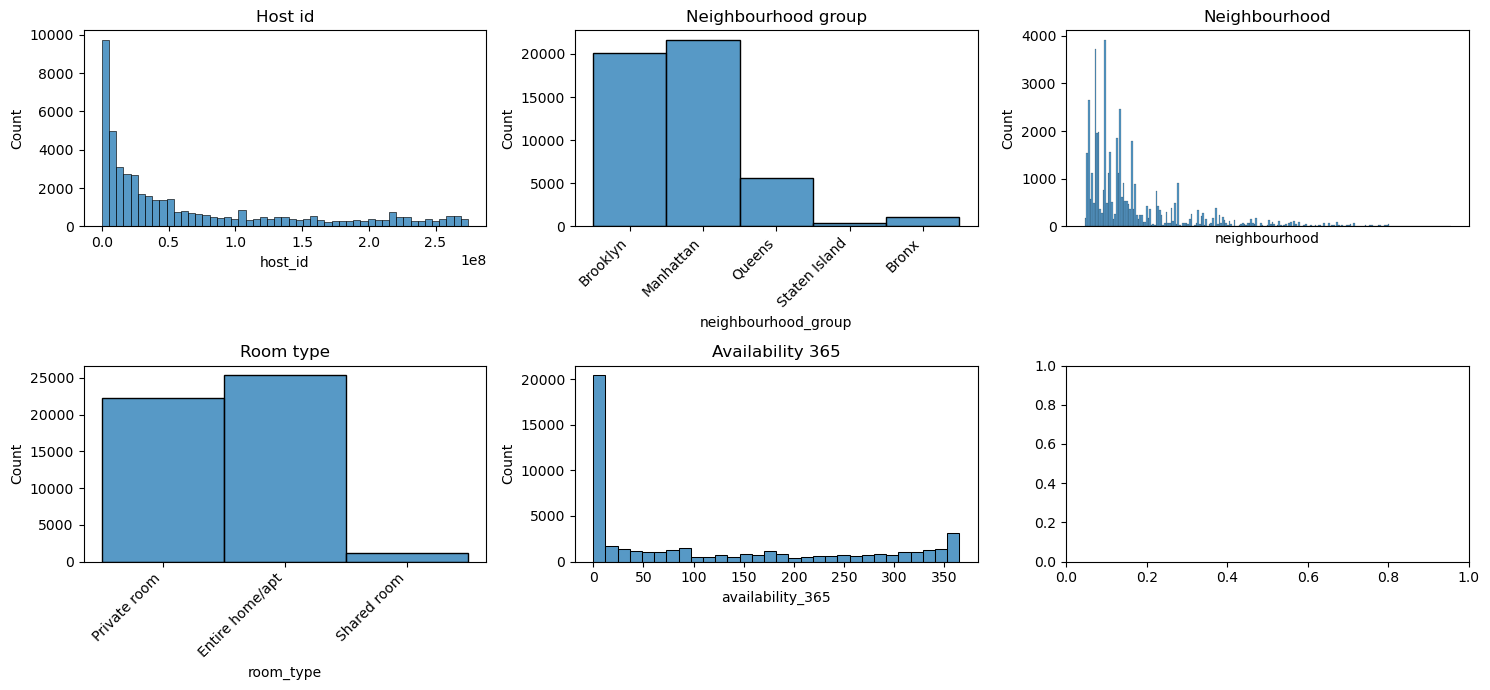

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

URL = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'

def getData(URL:str) -> pd.DataFrame:
    raw_data = pd.read_csv(URL)
    return pd.DataFrame(raw_data)

def cleanedData(df:pd.DataFrame) -> pd.DataFrame:
    df_ = df.copy()
    df_.drop('id', axis=1).duplicated() # No borra nada pero sería necesario en caso de que hubiera filas duplicada
    df_.drop('id', axis=1, inplace=True)
    df_.drop('name', axis=1, inplace=True)
    df_.drop('host_name', axis=1, inplace=True)
    df_.drop('last_review', axis=1, inplace=True)
    return df_

def histplot(columns, cleaned_data, axis_array):
    num_rows, num_cols = axis_array.shape
    for i, column in enumerate(columns):
        row = i // num_cols
        col = i % num_cols

        if row < num_rows and col < num_cols:
            ax = axis_array[row,col]
            ax.set_title(column.replace('_', ' ').capitalize())
            sns.histplot(ax = ax, data = cleaned_data, x = column)
            if column == 'neighbourhood':
                ax.set_xticks([])
            if column in ['neighbourhood_group', 'room_type']:
                ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

def main():
    raw_data = getData(URL)
    cleaned_data = cleanedData(raw_data)
    print(cleaned_data.info())

    # Categóricas
    fig, axis = plt.subplots(2, 3, figsize=(15, 7))
    categorical_variables = ['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'availability_365']
    histplot(categorical_variables, cleaned_data, axis)
    plt.tight_layout()
    plt.show()

    # Numéricas
    


main()

### Conclusiones sobre los gráficos:

- **Host ID (ID del Anfitrión)**: La mayoría de los host tienen un ID menor de 0.5e8 (50M).
- **Neightbourhood group (Distrito)**: La mayoría de los húespedes son de Brooklyn y Manhattan mientras que se aprecia como no hay practicamente nadie de Staten Island y el Bronx.
- **Neighbourhood (Barrios)**: Se puede observar cómo se acumula la mayoría de alojamientos en algunos barrios.
- **Room type (Tipo de habitaciones)**: La mayoría del alojamiento adoptado son o bien habitaciones privadas o bien una propiedad (casa o apartamento).
- **Availability_365 (Disponibilidad)**: La gran mayoría de alojamientos están disponibles únicamente menos de 10 días y hay algunos que están disponible todo o casi todo el año.